In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

In [90]:
df_airbnb = pd.read_csv('airbnb.csv', index_col='id', engine='python', sep =',', encoding="utf-8")
df_airbnb.head()

,host_name,host_response_time,host_response_rate,host_is_superhost,host_identity_verified,neighbourhood,zipcode,latitude,longitude,property_type,...,Wide_entrance_for_guests,Wide_entryway,Wide_hallways,Wifi,Window_guards,Wine_cooler,_toilet,translation_missing:_en.hosting_amenity_49,translation_missing:_en.hosting_amenity_50,m2
id,,,,,,,,,,,,,,,,,,,,,
17878,Matthias,within an hour,1.00,t,t,Copacabana,22020-050,-22.96592,-43.17896,Condominium,...,0,0,0,1,0,0,0,0,0,12169.0
25026,Viviane,within a day,0.91,f,t,Copacabana,22060-020,-22.97712,-43.19045,Apartment,...,0,0,0,1,0,0,0,0,0,12169.0
31560,Renata,within an hour,1.00,t,t,Ipanema,22410-003,-22.98302,-43.21427,Apartment,...,0,0,0,1,0,0,0,1,1,20908.0
35636,Patricia,within an hour,1.00,t,t,Ipanema,22081-020,-22.98816,-43.19359,Apartment,...,0,0,0,1,0,0,0,0,0,20908.0
35764,Patricia Miranda & Paulo,within an hour,1.00,t,t,Copacabana,21031-300,-22.98127,-43.19046,Loft,...,1,1,0,1,0,0,0,0,1,12169.0


In [91]:
# Converte os atributos categóricos em quantitativos discretos.
#for column in df_airbnb.columns:
#    if str(df_airbnb[column].dtype) not in ['float64', 'int64']:
#        df_airbnb[column] = df_airbnb[column].map \
#        (dict(zip(df_airbnb[column].unique().tolist(),range(len(df_airbnb[column].unique().tolist())))))
#df_airbnb

In [92]:
# Lista de atributos com maior correlação direta ou inversa com o preço

corr = df_airbnb.corr()
corr['abs_price'] = abs(corr['price'])
corr.sort_values(by = ['abs_price'], ascending = False, inplace = True)
corr['price'][1:51]

bathrooms                         0.346099
bedrooms                          0.340403
cleaning_fee                      0.297867
accommodates                      0.289593
security_deposit                  0.232237
beds                              0.230465
guests_included                   0.206380
Free_parking_on_premises          0.156258
extra_people                      0.142784
Pool                              0.139611
Dryer                             0.129335
latitude                         -0.105419
m2                                0.104599
reviews_per_month                -0.101669
Hot_tub                           0.099603
Washer                            0.096270
Air_conditioning                  0.095262
Dishwasher                        0.089541
Crib                              0.087597
Suitable_for_events               0.082411
Family/kid_friendly               0.080306
Internet                          0.078954
Full_kitchen                      0.076998
calculated_

Text(0.5, 0, 'Correlação')

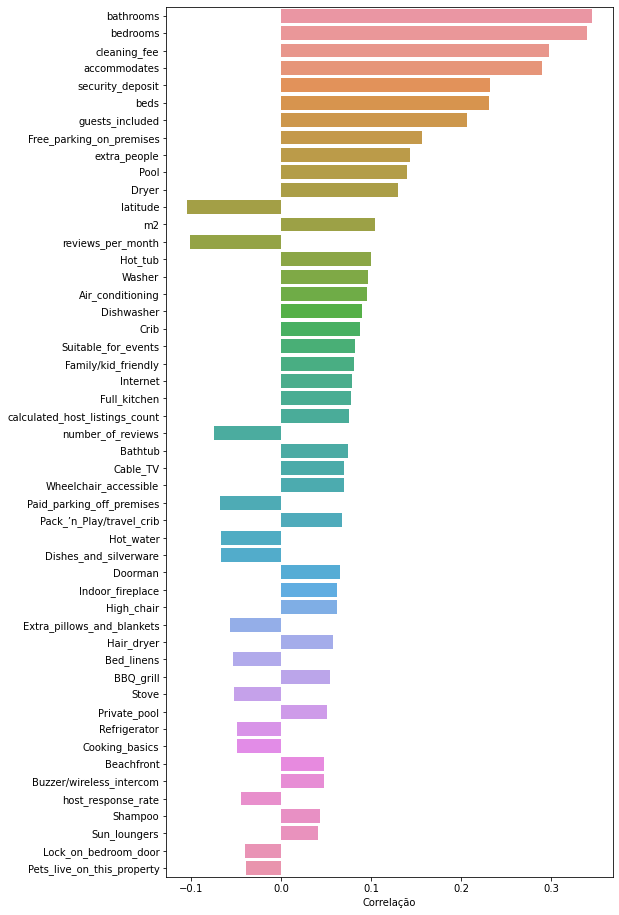

In [93]:
# Vixualização de atributos com maior correlação direta ou inversa com o preço

corr = corr['price'][1:51]
plt.figure(figsize=(8, 16))
ax = sns.barplot(corr.values, corr.index)
ax.set_xlabel('Correlação')

In [94]:
# Seleção dos vinte atributos mais relevantes à modelagem preditiva (feature selection).

# Atributos redundantes não serão selecionados para não confundir o modelo.
# A seleção será feita com base na força da correlação e na unicidade da característica descrita
# Por exemplo: Bathrooms, bedrooms, accomodates e beds referem-se à mesma característica: Capacidade de acomodação do imóvel
# Portanto, desses atributos, apenas um será selecionado.
# De acordo com o conhecimento do negócio, para essa característica, será Bedrooms.
# Pois o atributo de maior destaque em relação à acomodação, em anúncios de hospedagem, costuma ser a quantidade de quartos.

# Como o dataset possui 202 atributos e, pela descrição dos atributos mais relevantes, selecionamos os 10% melhores.

correlated = ['bedrooms', 'cleaning_fee', 'security_deposit', 'Free_parking_on_premises', 'extra_people', 'Pool', 'Dryer', 'm2', 'reviews_per_month', 'Hot_tub', 'Air_conditioning', 'Crib', 'Washer', 'Dishwasher', 'Suitable_for_events', 'property_type', 'Full_kitchen', 'Internet', 'Bathtub', 'Cable_TV']

In [95]:
# Seleção de atributos auxiliares e alvo

location = ['latitude', 'longitude', 'neighbourhood', 'property_type', 'room_type']
target = ['price']

In [96]:
# elaboração da lista de features a serem analisadas

features = location + correlated + target
features

['latitude',
 'longitude',
 'neighbourhood',
 'property_type',
 'room_type',
 'bedrooms',
 'cleaning_fee',
 'security_deposit',
 'Free_parking_on_premises',
 'extra_people',
 'Pool',
 'Dryer',
 'm2',
 'reviews_per_month',
 'Hot_tub',
 'Air_conditioning',
 'Crib',
 'Washer',
 'Dishwasher',
 'Suitable_for_events',
 'property_type',
 'Full_kitchen',
 'Internet',
 'Bathtub',
 'Cable_TV',
 'price']

In [97]:
#df_airbnb = df_airbnb[features]
df_airbnb

,host_name,host_response_time,host_response_rate,host_is_superhost,host_identity_verified,neighbourhood,zipcode,latitude,longitude,property_type,...,Wide_entrance_for_guests,Wide_entryway,Wide_hallways,Wifi,Window_guards,Wine_cooler,_toilet,translation_missing:_en.hosting_amenity_49,translation_missing:_en.hosting_amenity_50,m2
id,,,,,,,,,,,,,,,,,,,,,
17878,Matthias,within an hour,1.00,t,t,Copacabana,22020-050,-22.96592,-43.17896,Condominium,...,0,0,0,1,0,0,0,0,0,12169.0
25026,Viviane,within a day,0.91,f,t,Copacabana,22060-020,-22.97712,-43.19045,Apartment,...,0,0,0,1,0,0,0,0,0,12169.0
31560,Renata,within an hour,1.00,t,t,Ipanema,22410-003,-22.98302,-43.21427,Apartment,...,0,0,0,1,0,0,0,1,1,20908.0
35636,Patricia,within an hour,1.00,t,t,Ipanema,22081-020,-22.98816,-43.19359,Apartment,...,0,0,0,1,0,0,0,0,0,20908.0
35764,Patricia Miranda & Paulo,within an hour,1.00,t,t,Copacabana,21031-300,-22.98127,-43.19046,Loft,...,1,1,0,1,0,0,0,0,1,12169.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40009653,Lya,within a few hours,1.00,f,f,Copacabana,22081-000,-22.98304,-43.19569,Apartment,...,0,0,0,1,0,0,0,0,0,12169.0
40025707,Marcos Antonio,within an hour,1.00,f,t,Copacabana,22040-001,-22.97132,-43.18929,Apartment,...,0,0,0,1,0,0,0,0,0,12169.0
40033232,Priscila,within a few hours,0.92,f,t,Santa Teresa,20241-080,-22.91599,-43.17894,Apartment,...,0,0,0,1,0,0,0,0,0,7869.0


In [98]:
# Mapa de calor - Concentração de anúncios por bairros

m=folium.Map([-22.92538,-43.29582],zoom_start=12)
HeatMap(df_airbnb[['latitude','longitude']],radius=8,gradient={0.25:'blue',0.5:'purple',0.75:'orange',1.0:'red'}).add_to(m)
display(m)

Text(0.5, 0, 'Média de preço por bairro')

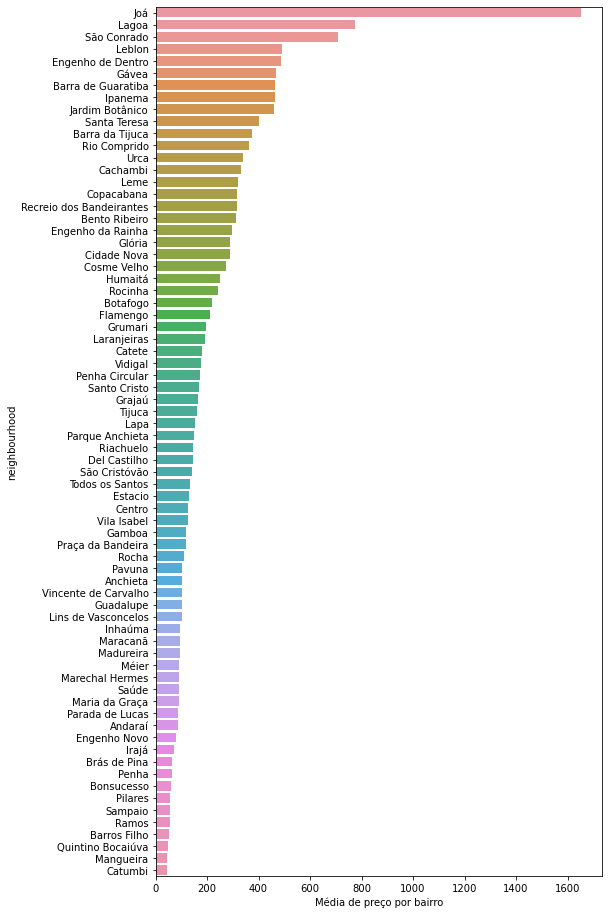

In [99]:
# Exibindo a média de preços dos anúncios por bairro

df_plot = pd.DataFrame(data=df_airbnb.groupby("neighbourhood")["price"].mean())
df_plot.sort_values(by="price", ascending=False, inplace=True)
df_plot.reset_index(inplace=True)
plt.figure(figsize=(8, 16))
ax = sns.barplot(y='neighbourhood', x='price', data=df_plot)
ax.set_xlabel('Média de preço por bairro')

Text(0.5, 0, 'Contagem de anúncios por bairro')

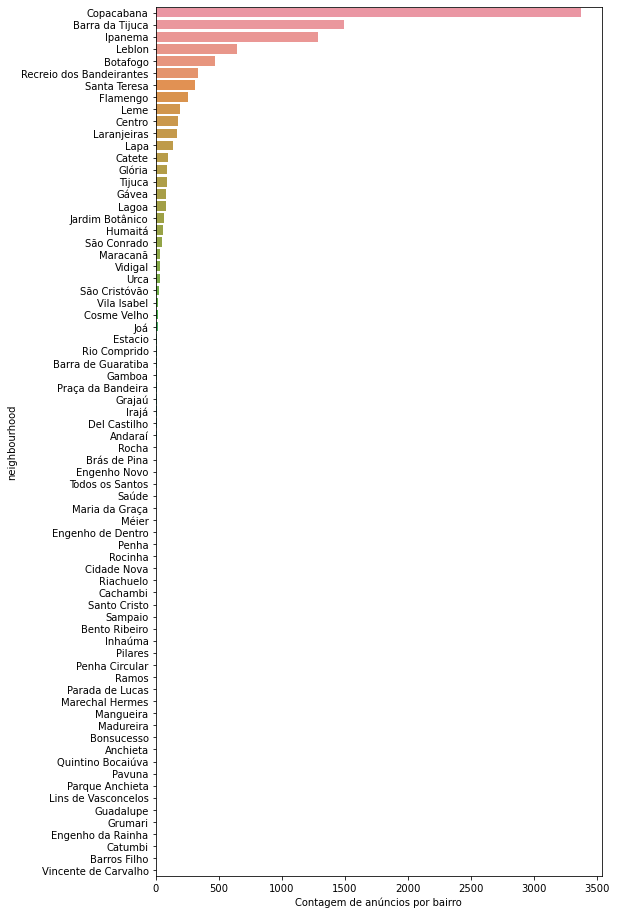

In [100]:
# Exibindo a contagem de anúncios por bairro

df_plot = pd.DataFrame(data=df_airbnb.groupby("neighbourhood")["price"].count())
df_plot.sort_values(by="price", ascending=False, inplace=True)
df_plot.reset_index(inplace=True)
plt.figure(figsize=(8, 16))
ax = sns.barplot(y='neighbourhood', x='price', data=df_plot)
ax.set_xlabel('Contagem de anúncios por bairro')

In [101]:
# O bairro do Joá produziu uma distorção nas estatísticas, pois possui poucos anúncios, porém com uma média de valores bastante alta.
# Além disso, observamos uma grande quantidade de bairros com poucos anúncios, o que poderia causar distorções semelhantes.
# Outros exemplos: Barra de Guaratiba, Rio Comprido e Bento Ribeiro.
# Pelo conhecimento do negócio, é sabido que essas regiões não possuem um valor condizente com suas respectivas médias.
# Portanto, decidiremos por analisar apenas 25% dos bairros com a maior quantidade de anúncios, para evitar esse tipo de distorção.

bairros_validos = df_plot['neighbourhood'].head(int(len(df_plot)*(0.25))).to_list()
bairros_validos

['Copacabana',
 'Barra da Tijuca',
 'Ipanema',
 'Leblon',
 'Botafogo',
 'Recreio dos Bandeirantes',
 'Santa Teresa',
 'Flamengo',
 'Leme',
 'Centro',
 'Laranjeiras',
 'Lapa',
 'Catete',
 'Glória',
 'Tijuca',
 'Gávea',
 'Lagoa',
 'Jardim Botânico']

In [102]:
# Aplicando o filtro no dataframe

df_airbnb = df_airbnb[df_airbnb['neighbourhood'].isin(bairros_validos)]
df_airbnb.shape

(9364, 203)

In [103]:
df_airbnb.describe()

,host_response_rate,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,...,Wide_entrance_for_guests,Wide_entryway,Wide_hallways,Wifi,Window_guards,Wine_cooler,_toilet,translation_missing:_en.hosting_amenity_49,translation_missing:_en.hosting_amenity_50,m2
count,9364.000000,9364.000000,9364.000000,9364.000000,9364.000000,9364.000000,9364.000000,9364.000000,9364.000000,9364.000000,...,9364.000000,9364.000000,9364.000000,9364.000000,9364.000000,9364.000000,9364.000000,9364.000000,9364.000000,9364.000000
mean,0.919752,-22.972215,-43.229913,4.242738,1.596166,1.570589,2.642247,348.061726,659.759398,148.193614,...,0.133810,0.082550,0.124092,0.942226,0.055852,0.000427,0.028407,0.093443,0.136907,12967.181760
std,0.173544,0.025245,0.080950,2.305125,0.876835,0.993213,1.926047,669.020077,1360.006355,101.203902,...,0.340467,0.275216,0.329704,0.233329,0.229648,0.020665,0.166141,0.291068,0.343768,4943.996298
min,0.000000,-23.032630,-43.523750,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3277.000000
25%,0.900000,-22.984630,-43.222552,2.000000,1.000000,1.000000,1.000000,143.000000,0.000000,100.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9334.000000
50%,1.000000,-22.976015,-43.192110,4.000000,1.000000,1.000000,2.000000,218.000000,400.000000,150.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12169.000000
75%,1.000000,-22.963830,-43.184595,5.000000,2.000000,2.000000,3.000000,369.000000,800.000000,195.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12211.000000
max,1.000000,-22.896090,-43.164160,25.000000,15.000000,15.000000,35.000000,31398.000000,20991.000000,1469.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,23625.000000


Text(0.5, 0, 'Média de preço por bairro')

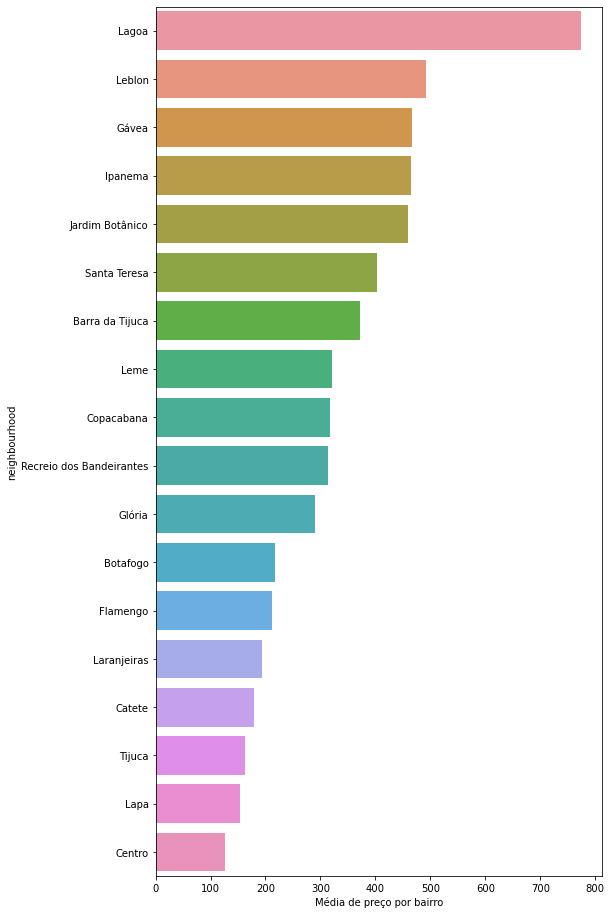

In [104]:
# Exibindo a média de preços dos anúncios por bairro - apenas com os bairros com mais anúncios

df_plot = pd.DataFrame(data=df_airbnb.groupby("neighbourhood")["price"].mean())
df_plot.sort_values(by="price", ascending=False, inplace=True)
df_plot.reset_index(inplace=True)
df_plot = df_plot[df_plot['neighbourhood'].isin(bairros_validos)]
plt.figure(figsize=(8, 16))
ax = sns.barplot(y='neighbourhood', x='price', data=df_plot)
ax.set_xlabel('Média de preço por bairro')

Text(0.5, 0, 'Contagem de anúncios por bairro')

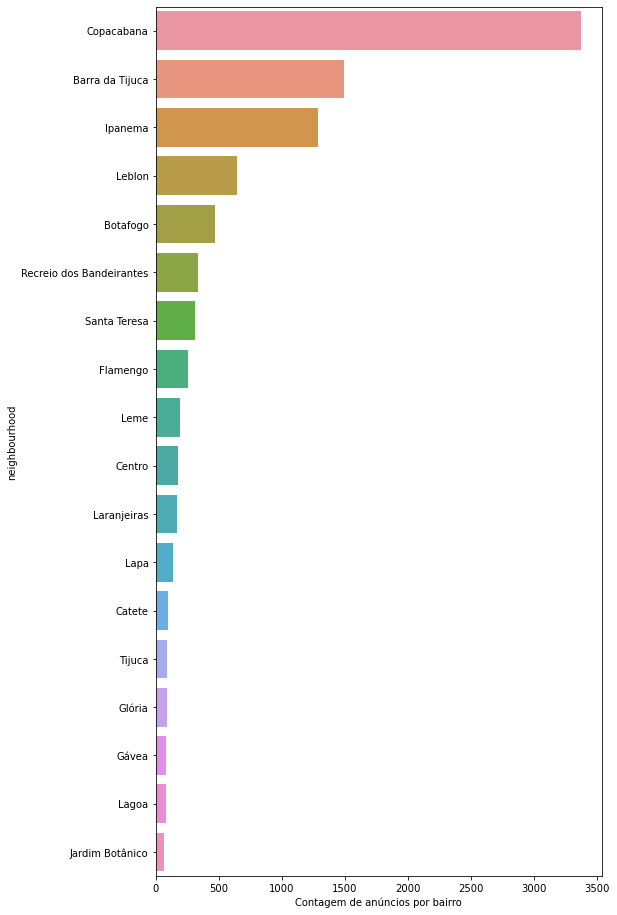

In [105]:
# Exibindo a contagem de anúncios por bairro - apenas com os bairros com mais anúncios

df_plot = pd.DataFrame(data=df_airbnb.groupby("neighbourhood")["price"].count())
df_plot.sort_values(by="price", ascending=False, inplace=True)
df_plot.reset_index(inplace=True)
df_plot = df_plot[df_plot['neighbourhood'].isin(bairros_validos)]
plt.figure(figsize=(8, 16))
ax = sns.barplot(y='neighbourhood', x='price', data=df_plot)
ax.set_xlabel('Contagem de anúncios por bairro')

In [106]:
df_properties_statistics = pd.DataFrame(data=df_airbnb.groupby("property_type")["price"].count())
df_properties_statistics.rename(columns={"price":"quantidade"}, inplace=True)
df_properties_statistics.sort_values(by="quantidade", ascending=False, inplace=True)
df_properties_statistics

,quantidade
property_type,
Apartment,7423
Condominium,658
House,379
Serviced apartment,348
Loft,253
Guest suite,55
Guesthouse,46
Aparthotel,42
Bed and breakfast,33


Text(0.5, 0, 'Contagem de anúncios por tipos de propriedades - com filtro')

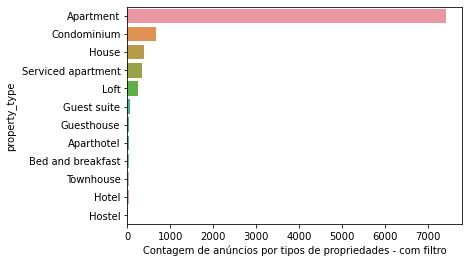

In [107]:
tipos_de_propriedades_validas = df_properties_statistics.head(int(len(df_properties_statistics)*(0.5)))
ax = sns.barplot(tipos_de_propriedades_validas.quantidade, tipos_de_propriedades_validas.index)
ax.set_xlabel('Contagem de anúncios por tipos de propriedades - com filtro')

In [108]:
# Aplicando o filtro de tipos de propriedades no dataframe

df_airbnb = df_airbnb[df_airbnb['property_type'].isin(tipos_de_propriedades_validas.index.to_list())]
df_airbnb.shape

(9311, 203)

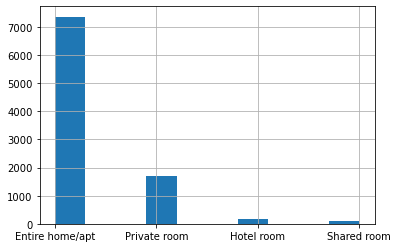

In [109]:
df_airbnb['room_type'].hist()

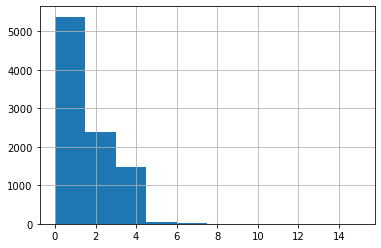

In [110]:
df_airbnb['bedrooms'].hist()

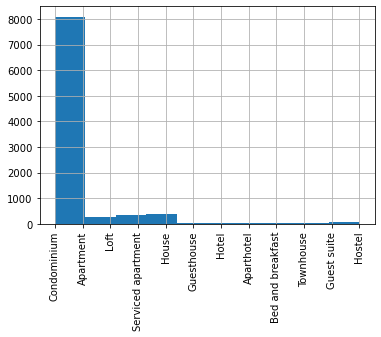

In [111]:
plt.xticks(rotation=90)
df_airbnb['property_type'].hist()